### How does a coin toss ?

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
g =9.81

In [32]:
def w_relation(u,n):
    return (2*n+0.5)*np.pi*g/(2*u)

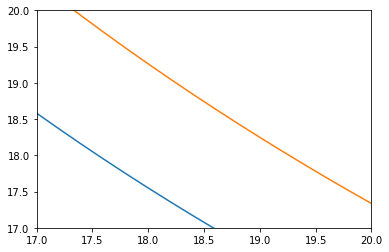

In [91]:
u = np.linspace(0.1,100,1000)
plt.plot(u,w_relation(u,10))
plt.plot(u,w_relation(u,11))
patches.Rectangle((19.25,19.25),1,1)
plt.xlim(17,20)
plt.ylim(17,20)
plt.show()

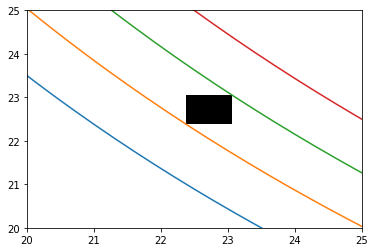

In [135]:
u = np.linspace(0.1,100,1000)
for i in [15,16,17,18]:
    plt.plot(u,w_relation(u,i))
a =22.38
u_0=a
delta_u = 1.4*np.pi*g/(2*np.sqrt(2)*u_0)
rectangle = plt.Rectangle((a, a), delta_u, delta_u, fc='k')
plt.gca().add_patch(rectangle)

plt.xlim(20,25)
plt.ylim(20,25)
plt.show()

In [34]:
w_relation(w_relation(20,10),10)

20.0

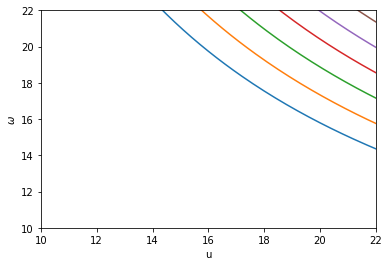

In [35]:
u = np.linspace(0.1,100,1000)
for n in range(10,18):
    plt.plot(u,w_relation(u,n))
plt.xlim(10,22)
plt.ylim(10,22)
plt.xlabel('u')
plt.ylabel('$\omega$')
plt.show()

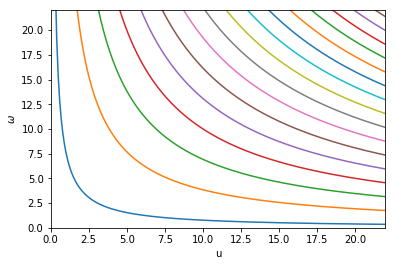

In [36]:
u = np.linspace(0.1,100,1000)
for n in range(18):
    plt.plot(u,w_relation(u,n))
plt.xlim(0,22)
plt.ylim(0,22)
plt.xlabel('u')
plt.ylabel('$\omega$')
plt.savefig('mainplot.pdf')
plt.show()

In [ ]:
u = np.linspace(0.1,100,1000)
plt.plot(u,w_relation(u,10))
plt.plot(u,w_relation(u,11))
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [37]:
u_0=10000

In [38]:
def diag_length(n,u_0 = u_0):
    return (2*n-1)*np.pi*g/(2*np.sqrt(2)*u_0)

In [41]:
def prob_from_diagonals(d,u_0 =u_0):
    
    d_1 = diag_length(1,u_0)
    if d <= d_1:
        return 1
    else:
        return 1- (d-d_1)**2/d**2

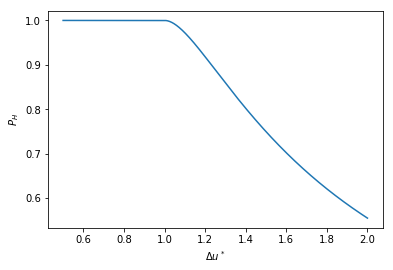

In [68]:
dspace = np.linspace(0,diag_length(2),1000)
scal_factor= (1/diag_length(1))
prob_vector = [prob_from_diagonals(d) for d in dspace]
plt.plot(0.5*(scal_factor*dspace+1), prob_vector)
plt.ylabel('$P_{H}$')
plt.xlabel('$\Delta u^*$')
plt.show()

In [52]:
min(prob_vector)

0.5555555555555555

In [64]:
def prob_dist(d,u_0 =u_0):
    d_1 = diag_length(1,u_0)
    region_1  = 0.5*(d**2-(d-d_1)**2)
    n = np.floor(0.5*(d/diag_length(1,u_0)+1))
    prob_regions = [region_1]
    for i in range(1,int(n)):
        region_x = (2*d- diag_length(i,u_0)-diag_length(i+1,u_0))*d_1
        prob_regions.append(region_x)
    region_c = 0.5*(d-diag_length(n,u_0))**2
    prob_regions.append(region_c)
    return np.array(prob_regions)/(0.5*d**2)

In [65]:
def plot_prob_dist(d,u_0=u_0):
    d_1 = diag_length(1,u_0)
    if d <= d_1:
        return 1
    return sum(prob_dist(d,u_0)[::2])

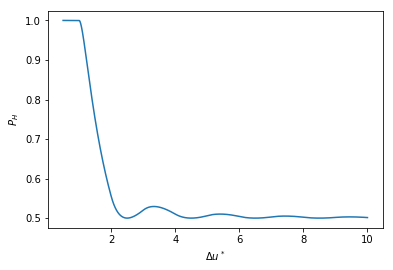

In [85]:
dspace = np.linspace(0,diag_length(10),10000)
plt_vector = [plot_prob_dist(d)  for d in dspace]
plt.plot(0.5*(scal_factor*dspace+1), plt_vector)
plt.ylabel('$P_{H}$')
plt.xlabel('$\Delta u^*$')
plt.show()

In [86]:
plt_vector[-1]

0.5013850415512466

In [87]:
min(plt_vector)

0.500000000312578